# Direcciones,
# Deuda Alquimia,
# y las Transformas

<a href="https://colab.research.google.com/github/ProfDoeg/Colegio_Invisible/blob/master/05_cuaderno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparar el Espacio (Prepare the Space)

In [1]:
! git clone https://github.com/ProfDoeg/Colegio_Invisible.git
! pip install eciespy eth_keys cryptos qrcode base58 

Cloning into 'Colegio_Invisible'...
remote: Enumerating objects: 745, done.
remote: Counting objects: 100% (559/559), done.
remote: Compressing objects: 100% (534/534), done.
remote: Total 745 (delta 379), reused 23 (delta 23), pack-reused 186
Receiving objects: 100% (745/745), 55.82 MiB | 16.96 MiB/s, done.
Resolving deltas: 100% (491/491), done.
     |████████████████████████████████| 69 kB 2.9 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 555 kB 7.9 MB/s 
     |████████████████████████████████| 2.0 MB 54.4 MB/s 
     |████████████████████████████████| 104 kB 65.4 MB/s 
     |████████████████████████████████| 481 kB 58.3 MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.11.2-cp37-cp37m-linux_x86_64.whl size=1230802 sha256=2f542a4e21b0deba959b375cefc4e6d9b879edce3232c4d551666243568cfceb
  Stored in directory: /root/.cache/pip/wheels/38/70/71/ca13ea3d36ccd0b3d0ec7d7a4ca67522048d695b556bba4f59
  Created wheel for qrcode: filena

# Historias

In [ ]:
from IPython.display import Audio
display(Audio("Colegio_Invisible/sound/rump_1.m4a"))
display(Audio("Colegio_Invisible/sound/rump_2.m4a"))

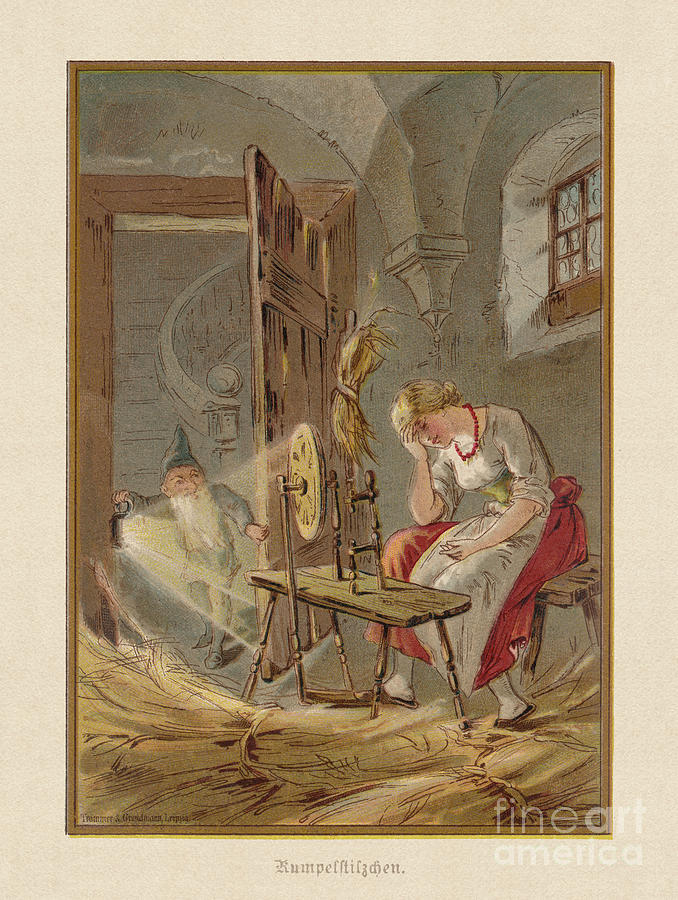

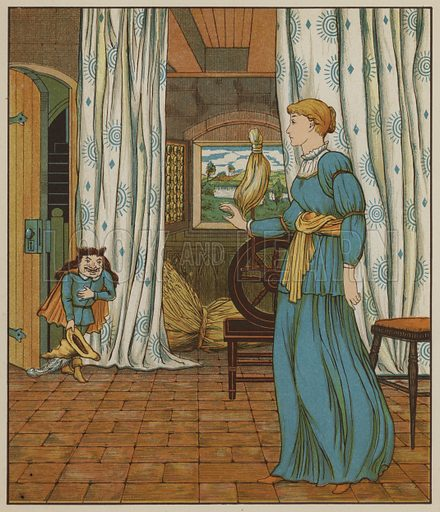

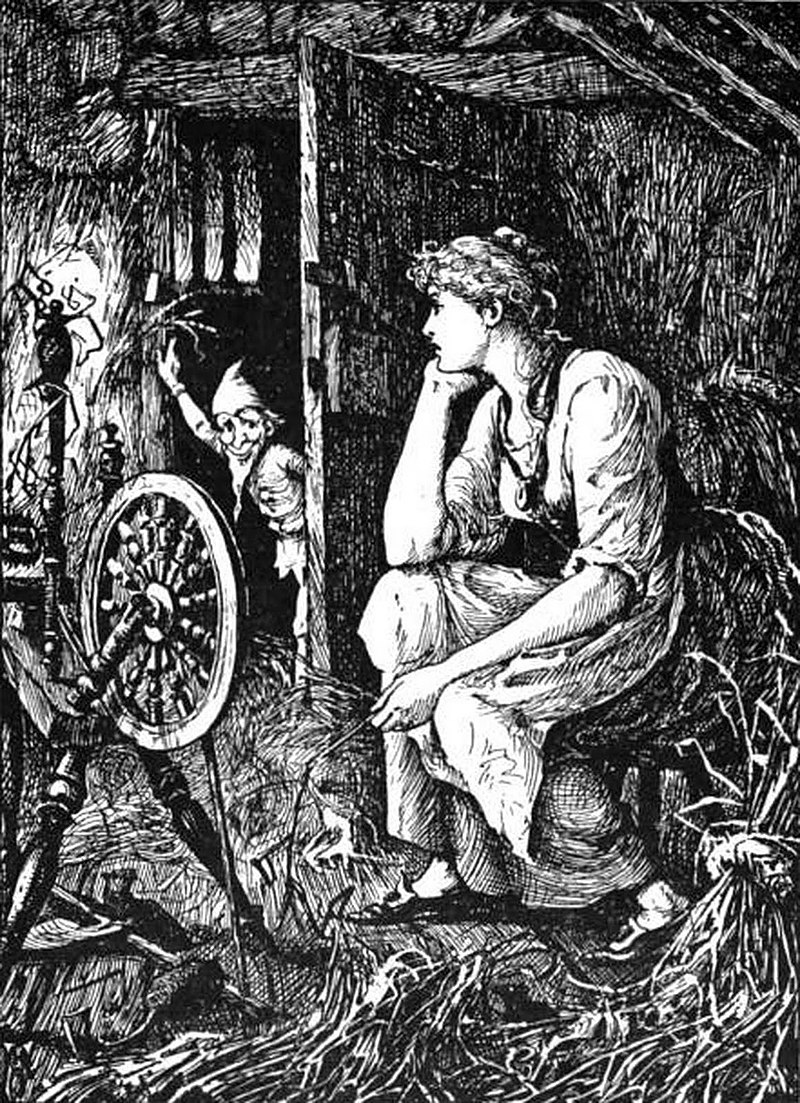

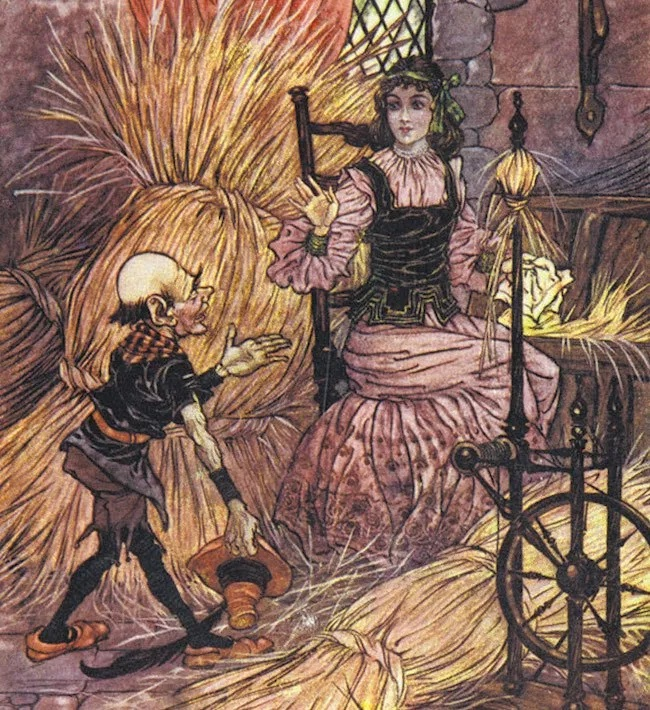

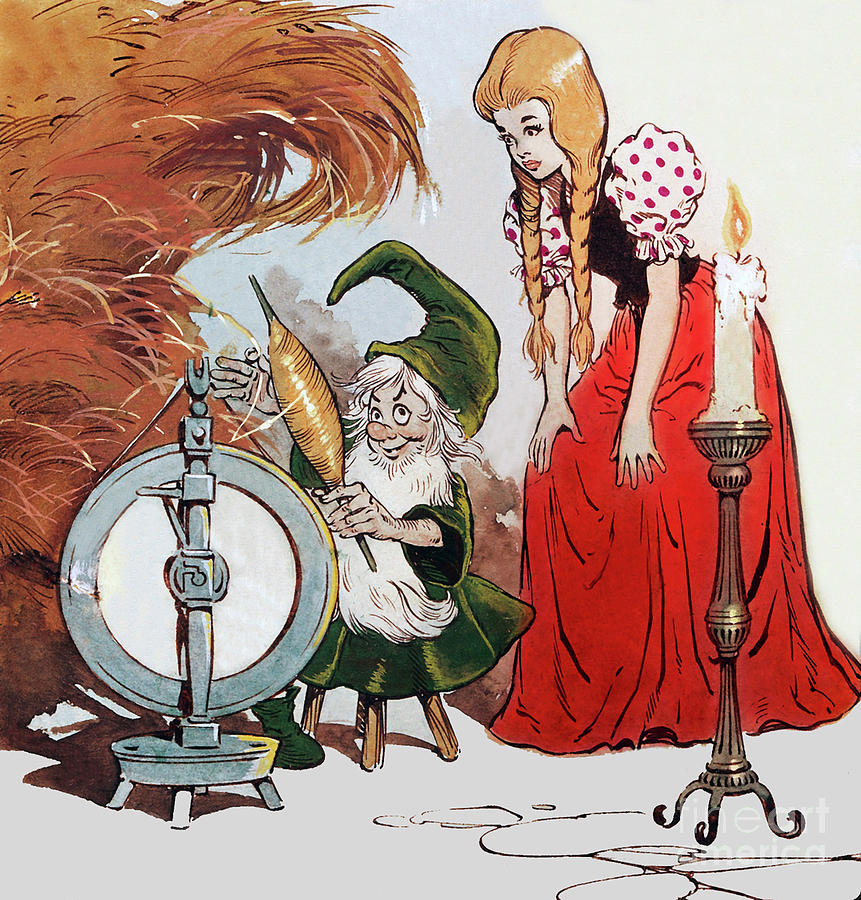

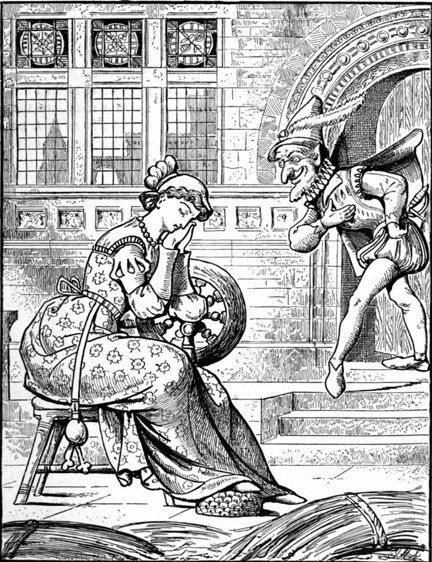

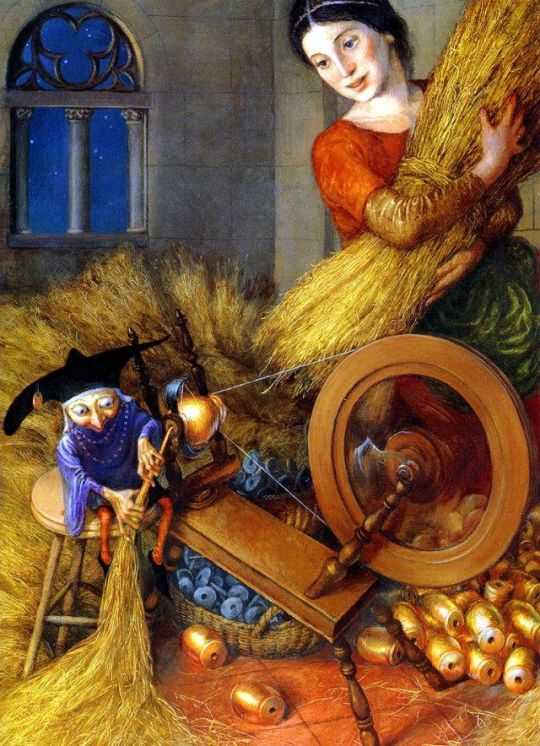

In [ ]:
from IPython.display import Image 
import os
imgs = [img for img in os.listdir('Colegio_Invisible/img') if 'rum_' in img]
for img in sorted(imgs)[1:]:
    path = f'Colegio_Invisible/img/{img}'
    show=Image(path)
    display(show)

# Direcciones de Criptomoneda (Cryptocurrency Addresses)

## Esquema (Outline)

Comenzar a usar criptografía asimétrica y hash para la aplicación de criptomonedas. 
***
Begin using asymmetic cryptography and hashing for appliction of cyptocurrency

## Metas (Goals)

- comprender el concepto de direcciones de criptomonedas \
(understand concept of cryptomoneda addresses)
- comprender el mapeo unidireccional de la clave privada a la pública, y de la pública a la dirección \
(understand one-way mapping from private key to public key, and from public key to address) 
- ser capaz de usar la función para generar un nuevo par de claves y archivos de direcciones \
(use function to generate new key pair and address files)
- guardar archivos de claves localmente y en Google Drive \
(save keyfiles locally and on google drive)
- ejecutar a mano el proceso de generación de direcciones \
(exectute address generation process by hand)
- comprender la codificación `base58` de Satoshi \
(understand Satoshi's `base58` encoding) 
- comprender la codificación **WIF** para claves privadas \
(understand **WIF** [Wallet Import Format] encoding for private keys)
- convertir entre claves privadas WIF y hexadecimales \
(convert between WIF and hex private keys)

# Claves Privadas, Claves Públicas y Direcciones (Private Keys, Public Keys and Addresses)

<br></br>
<div>
<img src="https://github.com/ProfDoeg/Colegio_Invisible/raw/main/img/prv_pub_addr.png" width="800"/>
</div>

***
Para jugar el juego de las criptomonedas, necesitamos poder administrar claves privadas, claves públicas y direcciones.
***
***
In order to play the cryptocurrency game we need to be able to manage private keys, public keys and addresses.
***
- **clave privada** que conoce de la criptografía asimétrica. Usamos la curva ECC Secp256k1. Esto está hecho de 256 bits de entropía. \
 (**private key** you know from asymmetric cryptography. We use the ECC Secp256k1 curve. This is made of 256 bits of entropy) 
- **clave publica** que conoce de la criptografía asimétrica. Esta clave se deriva de la clave privada.\
 (**public key** you know from asymmetric cryptography. This key is derived from the private key)
- La **dirección** es una serie de hashes de la clave pública y, más a menudo, una codificación base58\
 (The **address** is a series of hashes of the public key and more often a `base58` encoding)
***
LINKS:
- https://en.bitcoin.it/wiki/Secp256k1
- https://en.bitcoin.it/wiki/Wallet_import_format
- https://en.bitcoin.it/wiki/Technical_background_of_version_1_Bitcoin_addresses
- https://en.bitcoin.it/wiki/Base58Check_encoding
***

## Importaciones y Definiciones (Imports and Definitions)

Crear funciones para generar pares de claves y direcciones de criptomonedas.
***
Create functions for generating key pairs and cryptomoneda addresses.

In [2]:
import hashlib
import os
import getpass
import ecies
import eth_keys
import cryptos
import qrcode
import base58
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def save_privkey(privkey,privkey_filepath,password=None):
    if password==None:
        while True:
                password = getpass.getpass("Input password for encrypting keyfile: ")
                password_2 = getpass.getpass("Repeat password for encrypting keyfile: ")
                if password==password_2:
                    print('\nPasswords match...')
                    break
                else:
                    print('\nPasswords do not match...')
    encrypted_bytes=ecies.aes_encrypt(key=hashlib.sha256(password.encode()).digest(),
                                      plain_text=privkey.to_bytes())
    open(privkey_filepath,'wb').write(encrypted_bytes)
    print(f'Password protected file written to {privkey_filepath} containing {encrypted_bytes.hex()}')
    
def save_pubkey(pubkey,pubkey_filepath):
    open(pubkey_filepath,'wb').write(pubkey.to_bytes())
    print(f'File written to {pubkey_filepath} containing {pubkey.to_bytes().hex()}')
    
def save_addr(addr,addr_filepath):
    open(addr_filepath,'wb').write(addr.encode())
    print(f'Address written to {addr_filepath} containing {addr}')

def make_qr(data,image_path=None):
    qr = qrcode.QRCode(version=1,box_size=5,border=2)
    qr.add_data(data)
    qr.make(fit=True)
    img = qr.make_image(fill='black', back_color='white')
    if image_path!=None:
        img.save(image_path)
    return img
    
def gen_save_keys_addr(basename_filepath,password=None,coin='Doge'):
    if os.path.isfile(basename_filepath+'_prv.enc'):
        privkey2save=import_privKey(basename_filepath+'_prv.enc',password)
    else:
        privkey2save = ecies.utils.generate_eth_key()
    pubkey2save = privkey2save.public_key    
    save_privkey(privkey2save,basename_filepath+'_prv.enc',password=password)
    save_pubkey(pubkey2save,basename_filepath+'_pub.bin')
    if coin[0].lower()=='d':
      doge = cryptos.Doge()
    else:
      doge = cryptos.Bitcoin()
    addr2save=doge.pubtoaddr('04'+pubkey2save.to_bytes().hex())
    save_addr(addr2save,basename_filepath+'_addr.bin')
    return make_qr(addr2save,basename_filepath+'_addr.png')
    
def import_privKey(privkey_filepath,password=None):
    if password==None:
        password = getpass.getpass("Input password for decrypting keyfile: ")
    password=password.encode()
    f=open(privkey_filepath,'rb')
    decrypted_bytes=ecies.aes_decrypt(key=hashlib.sha256(password).digest(),cipher_text=f.read())
    privKey=eth_keys.keys.PrivateKey(decrypted_bytes)
    return privKey

def import_pubKey(pubkey_filepath):
    f=open(pubkey_filepath,'rb')
    privKey=eth_keys.keys.PublicKey(f.read())
    return privKey

def import_addr(addr_filepath):
    return open(addr_filepath,'rb').read().decode()

# Crear Archivos de Clave Privada, Clave Pública y Dirección
#(Making Private Key, Public Key and Address Files)

## Partir de Sin Claves
## (Start from No Keys)

Si es la primera vez que ejecuta este cuaderno, comience creando un directorio `llaves`
***
If this is the first time you are running this cuaderno then start by creating a `llaves` directory

In [4]:
! ls

Colegio_Invisible  sample_data


In [5]:
! mkdir llaves

In [ ]:
#! rm -r llaves.zip

## Empezar desde Keys en Google Drive
## (Start from Keys on Google Drive)

Si ha ejecutado este cuaderno anteriormente y tiene claves guardadas en Google Drive
***
If you have run this cuaderno previously and have keys saved on Google Drive

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#! cp drive/MyDrive/cinv/llaves.zip llaves.zip 
#! unzip llaves.zip


## Comenzar desde las Claves en la Disco Local 
##(Start from Keys on Local Drive)

Si ha ejecutado este cuaderno anteriormente y tiene claves guardadas en su disco local
***
If you have run this cuaderno previously and have keys saved on your local disk


In [ ]:
#from google.colab import files
#fu=files.upload();

In [ ]:
#! unzip llaves.zip

## Generación de Claves y Direcciones de Criptomoneda
## (Generating Keys and Cryptomoneda Address)

Si el archivo de clave privada ya existe, la función usará la contraseña para abrir el archivo y generar la dirección a partir de esa clave guardada.
***
If the private key file already exists the function will use the password to open the file and generate address from that saved key.



In [6]:
! ls llaves

Password protected file written to llaves/mi_prv.enc containing dba27a875bc778f20a2b48435c60a4e7198c05d733fa441dfd7c41000521d886567e9322c563b852b2010a01665a47886228ea7cffed50d1930f00b1e9254a29
File written to llaves/mi_pub.bin containing 5f454cfa566e325f4f35cc969f25fb954138db6c6c372dd2007ed44cd1fa2df9d9f8d858e422ba97c254f1cf821c3ec45cf1b05c72c3515f8b0bf0ab8c2c6b37
Address written to llaves/mi_addr.bin containing DNL1BXLcRGzSYGD5fM6iGJQgeY18jtCxvo


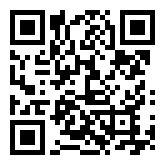

In [8]:
gen_save_keys_addr('llaves/mi',password='',coin='D')

In [9]:
privKey=import_privKey('llaves/mi_prv.enc','')
privKey,type(privKey)

('0xe164a3085205b041cd8082fd297b5c8938534afceffc4f78745f41768596c449',
 eth_keys.datatypes.PrivateKey)

In [10]:
pubKey=import_pubKey('llaves/mi_pub.bin')
pubKey,type(pubKey)

('0x5f454cfa566e325f4f35cc969f25fb954138db6c6c372dd2007ed44cd1fa2df9d9f8d858e422ba97c254f1cf821c3ec45cf1b05c72c3515f8b0bf0ab8c2c6b37',
 eth_keys.datatypes.PublicKey)

In [12]:
addr=import_addr('llaves/mi_addr.bin')
addr

'DNL1BXLcRGzSYGD5fM6iGJQgeY18jtCxvo'

# Gaurdar Claves (Save Keys)

Para guardar las claves recién generadas primero comprimimos el directorio `llaves`
***
To save newly generated keys we first zip the `llaves` directory

In [13]:
! zip -r llaves.zip llaves

  adding: llaves/ (stored 0%)
  adding: llaves/mi_prv.enc (stored 0%)
  adding: llaves/mi_addr.bin (stored 0%)
  adding: llaves/mi_pub.bin (stored 0%)
  adding: llaves/mi_addr.png (stored 0%)


## Guardar en Disco Local (Save on Local Disk)

Use el menú lateral para administrar archivos.

Descargue llaves.zip a su computadora local usando la GUI.

O podría descomentar y ejecutar la siguiente celda.
***

Use the side menu to manage files.

Download `llaves.zip` to your local computer using the GUI.

Or you could uncomment and run the following cell.

In [14]:
from google.colab import files
f=files.download('llaves.zip');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Guardar en Google Disco (Save on Google Drive)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! mkdir drive/MyDrive/cinv

In [ ]:
! cp llaves.zip drive/MyDrive/cinv/llaves.zip 

# Detalles de Generación de Direcciones
# (Address Generation Details)

## Ethereum

Generando una dirección para Ethereum:

use los últimos 20 bytes del hash **Keccak256** de la clave pública

***
Generating an address for Ethereum:

use last 20 bytes of the **Keccak256** hash of the public key 

In [15]:
from Crypto.Hash import keccak

In [16]:
kek=keccak.new(digest_bits=256)
kek.update(pubKey.to_bytes())
'0x'+kek.hexdigest()[-40:]

'0xfee2546999b5cf660801f570da6f3e2b63d44dd6'

In [17]:
pubKey.to_checksum_address()

'0xFeE2546999B5cF660801F570da6f3E2b63D44dD6'

## Bitcoin, Dogecoin y Otros



<div>
<img src="https://github.com/ProfDoeg/Colegio_Invisible/raw/main/img/PubKeyToAddr.png" width="300"/>
</div>

Si quisiéramos hacer la generación de direcciones a mano, sería de la siguiente manera.
***
If we wanted to do the address generation by hand, it would go as follows.

1) Comience con la **CLAVE PÚBLICA** precedida del byte **`04`**\
 (Start with the **PUBLIC KEY** prepended with byte **`04`**)

In [18]:
pubKey.to_hex()

'0x5f454cfa566e325f4f35cc969f25fb954138db6c6c372dd2007ed44cd1fa2df9d9f8d858e422ba97c254f1cf821c3ec45cf1b05c72c3515f8b0bf0ab8c2c6b37'

In [19]:
pbkey04='04'+pubKey.to_hex()[2:]
pbkey04

'045f454cfa566e325f4f35cc969f25fb954138db6c6c372dd2007ed44cd1fa2df9d9f8d858e422ba97c254f1cf821c3ec45cf1b05c72c3515f8b0bf0ab8c2c6b37'

2) Luego aplique el **`HASH160`**. Recuerde que esto es **`SHA256`** hash seguido de **`RIPMED160`** hash.\
 (Next apply the **`HASH160`**. Remember this is **`SHA256`** hashing followed by **`RIPMED160`** hashing)

In [20]:
from Crypto.Hash import RIPEMD160
import hashlib

h_256=hashlib.sha256(bytes.fromhex(pbkey04)).digest()
h_rip = RIPEMD160.new()
h_rip.update(h_256)
h_rip.hexdigest()

'bc8a3ddfb20426506d2bf31163dd5e1a3fb94eab'

Podemos hacer esto usando la biblioteca `cryptos` con una de las dos versiones de `*_hash160()`
***
We can do this using the `cryptos` library with one of two versions of `*_hash160()`



In [21]:
cryptos.bin_hash160(bytes.fromhex(pbkey04)).hex()

'bc8a3ddfb20426506d2bf31163dd5e1a3fb94eab'

In [22]:
pbkey_160=cryptos.hex_to_hash160(pbkey04)
pbkey_160

'bc8a3ddfb20426506d2bf31163dd5e1a3fb94eab'

3) Luego anteponga el **byte mágico** a la salida **`HASH160`**.\
  (Then prepend the **magic byte** to the **`HASH160`** output)

In [29]:
doge=cryptos.Doge()
magic=hex(doge.magicbyte)
#magic='0x00'
magic_pbkey_160=magic[2:]+pbkey_160

magic,magic_pbkey_160

('0x1e', '1ebc8a3ddfb20426506d2bf31163dd5e1a3fb94eab')

In [30]:
btc=cryptos.Bitcoin()
hex(btc.magicbyte)

'0x0'

4) \
Tome un desvío y complete el proyecto paralelo tomando el **DOBLE SHA256** de la salida anterior.\
(Take a detour and complete the side project taking the **DOUBLE SHA256** of the previous output)\
Los **primeros 4 bytes** de esto serán la **suma de verificación**\
(The **first 4 bytes** of this will be the **checksum**)\
Agregar este sufijo a la salida anterior generará la dirección en bytes/hex.\
(Appending this suffix to the previous output will yield the address in bytes/hex)

In [25]:
suffix=cryptos.dbl_sha256(bytes.fromhex(magic_pbkey_160))[:8]
suffix

'037da579'

In [26]:
hex_addr=magic_pbkey_160+suffix
hex_addr

'00bc8a3ddfb20426506d2bf31163dd5e1a3fb94eab037da579'

***
***
Lo anterior produce una dirección legítima, aunque generalmente tomamos el paso adicional de hacer una codificación base58.
***
The above yields a legit address though we generally take the additional step of doing a base58 encoding.
***
***
5) \
Finalmente hacemos una codificación **base58**\
(Finally we do a **base58** encoding)\
Tenga en cuenta que el prefijo de byte mágico de Dogecoin **`0x1e`** garantiza que la dirección base58 siempre comenzará con **`D`**\
(Note the magic byte prefix of Dogecoin **`0x1e`** ensures the base58 address will always start with a **`D`**)

In [27]:
base58.b58encode(bytes.fromhex(hex_addr)).decode()

'1JBueGPy7s6A1G2Uvm79iYF5mQGqQmVGsA'

In [28]:
addr

'DNL1BXLcRGzSYGD5fM6iGJQgeY18jtCxvo'

# WIF
***
***
Wallet Import Format (WIF) es la codificación base58 para claves privadas. Vale la pena repasarlo como ejercicio.
***
Wallet Import Format (WIF) is the base58 encoding for private keys. It is worth going over as an exercize.
***
***
1) \
Comience con una **CLAVE PRIVADA** y anteponga el byte específico de la red\
(Start with a **PRIVATE KEY** and prepend the network specific byte)\
`0x80` para Bitcoin y `0x9e` para Dogecoin.\
(`0x80` for Bitcoin and `0x9e` for Dogecoin)

In [ ]:
prvkey=privKey.to_hex()[2:]
prvkey

In [ ]:
prvkey9e='9e'+prvkey
prvkey9e

2) 
El segundo paso es **DOBLE SHA256** la clave privada antepuesta\
(Second step is to **DOUBLE SHA256** the prepended private key)\
Los **primeros 4 bytes** de la salida proporcionan el **sufijo de suma de comprobación**\
(The **first 4 bytes** of the output provide the **checksum suffix**)

In [ ]:
wif_checksum = cryptos.dbl_sha256(bytes.fromhex(prvkey9e))[:8]
wif_checksum

3) Por último, agregamos el sufijo a la clave privada y codificamos usando `base58`\
(Lastly we append the suffix to the private key and encode using `base58`)

In [ ]:
prvkey9e_suffixed=prvkey9e+wif_checksum
prvkey9e_suffixed

In [ ]:
wif=base58.b58encode(bytes.fromhex(prvkey9e_suffixed)).decode()
wif

In [ ]:
def to_wif(pvk,prefix='9e'):
    import base58
    import cryptos
    checksum=cryptos.dbl_sha256(bytes.fromhex(prefix+pvk))[:8]
    return base58.b58encode(bytes.fromhex(prefix+pvk+checksum)).decode()

def from_wif(wif):
    return base58.b58decode(wif).hex()[2:-8]

In [ ]:
doge_wif=to_wif(privKey.to_hex()[2:])
doge_wif

In [ ]:
og_prvkey=from_wif(doge_wif)
prvkey , og_prvkey==prvkey

# Base58
***
***
Para crear direcciones y claves privadas WIF, hemos estado usando codificaciones base58.
***
For creating addresses and WIF private keys, we have been using base58 encodings.
***
***
¿Qué tiene de genial base58?
***
What's so dope about base58?
***
***
- No deseamos que los caracteres `0OIl` tengan el mismo aspecto y puedan usarse para crear cadenas visualmente idénticas.\
 (We don't want `0OIl` characters that look the same in some fonts and could be used to create visually identical looking strings)
- Una cadena con caracteres no alfanuméricos no se acepta tan fácilmente.\
(A string with non-alphanumeric characters is not as easily accepted)

In [ ]:
hexstring=prvkey9e_suffixed

code_string = "123456789ABCDEFGHJKLMNPQRSTUVWXYZabcdefghijkmnopqrstuvwxyz"
x = int(hexstring,base=16)
output_list = []
   
while(x > 0):
    (remainder,x) = x%58,x//58
    output_list.append(code_string[remainder])

''.join(output_list)[::-1]

In [ ]:
wif